In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Insert the directory
import sys
sys.path.insert(0,"/content/drive/My Drive/TSOAI/S6")

In [3]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchsummary import summary
from model import Net
from model import train,test
from utils import display_model_summary

In [4]:
#!pip install torchsummary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
#model
display_model_summary(model)

#def display_model_summary1(model,input_structure=(1,28,28)):
  #summary(model, input_size=input_structure)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              80
       BatchNorm2d-2            [-1, 8, 26, 26]              16
              ReLU-3            [-1, 8, 26, 26]               0
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,168
       BatchNorm2d-6           [-1, 16, 24, 24]              32
              ReLU-7           [-1, 16, 24, 24]               0
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9           [-1, 16, 22, 22]           2,320
      BatchNorm2d-10           [-1, 16, 22, 22]              32
             ReLU-11           [-1, 16, 22, 22]               0
          Dropout-12           [-1, 16, 22, 22]               0
        MaxPool2d-13           [-1, 16, 11, 11]               0
           Conv2d-14             [-1, 1

In [ ]:
# random seed
torch.manual_seed(1)
# batch size 
batch_size = 256
# number of workers , set up pin memory, 
kwargs = {'num_workers': 2, 'pin_memory': True,'persistent_workers':True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    # download,training data 
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        # Random rotation
                        transforms.RandomRotation((-15., 15.), fill=0),
                        # convert to tensor
                        transforms.ToTensor(),
                        # normalize
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        # convert to tensor
                        transforms.ToTensor(),
                        # normalize
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)

In [6]:
# instantiate the model and load it to the device
model = Net().to(device)
# set up the optimizer with model parameters , learning rate and momentum
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler 
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.5, verbose=True)
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []
# Number of Epochs or how many times the entire data is used for training
num_epochs = 20
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  ## Send the model , device , train_loader,optimizer and loss function to the train function
  train_accuracy,train_loss = train(model, device, train_loader, optimizer,epoch)
  # Append the train accuracy and test loss value of the ith epoch 
  train_acc.append(train_accuracy)
  train_losses.append(train_loss)
  ## Send the model,device,test_loader and loss function
  test_accuracy,test_loss = test(model, device, test_loader)
  #store the test and loss and test accuracy for this epoch
  test_losses.append(test_loss)
  test_acc.append(test_accuracy)
  #  learning rate of the optimizer will be adjusted according to the predefined schedule
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


loss=0.07057617604732513 batch_id=234: 100%|██████████| 235/235 [00:22<00:00, 10.23it/s]



Test set: Average loss: 0.0746, Accuracy: 9786/10000 (97.86%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


loss=0.02137698046863079 batch_id=234: 100%|██████████| 235/235 [00:20<00:00, 11.31it/s]



Test set: Average loss: 0.0470, Accuracy: 9848/10000 (98.48%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


loss=0.053245458751916885 batch_id=234: 100%|██████████| 235/235 [00:23<00:00, 10.18it/s]



Test set: Average loss: 0.0387, Accuracy: 9873/10000 (98.73%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


loss=0.025967000052332878 batch_id=234: 100%|██████████| 235/235 [00:21<00:00, 11.18it/s]



Test set: Average loss: 0.0377, Accuracy: 9875/10000 (98.75%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


loss=0.0273427814245224 batch_id=234: 100%|██████████| 235/235 [00:20<00:00, 11.48it/s]



Test set: Average loss: 0.0282, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


loss=0.026912085711956024 batch_id=234: 100%|██████████| 235/235 [00:22<00:00, 10.55it/s]



Test set: Average loss: 0.0273, Accuracy: 9920/10000 (99.20%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


loss=0.0755193755030632 batch_id=234: 100%|██████████| 235/235 [00:20<00:00, 11.46it/s]



Test set: Average loss: 0.0229, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


loss=0.08389047533273697 batch_id=234: 100%|██████████| 235/235 [00:22<00:00, 10.63it/s]



Test set: Average loss: 0.0226, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


loss=0.005813260097056627 batch_id=234: 100%|██████████| 235/235 [00:20<00:00, 11.65it/s]



Test set: Average loss: 0.0238, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


loss=0.10314703732728958 batch_id=234: 100%|██████████| 235/235 [00:21<00:00, 10.81it/s]



Test set: Average loss: 0.0211, Accuracy: 9937/10000 (99.37%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


loss=0.07631514966487885 batch_id=234: 100%|██████████| 235/235 [00:20<00:00, 11.71it/s]



Test set: Average loss: 0.0261, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


loss=0.11064334958791733 batch_id=234: 100%|██████████| 235/235 [00:20<00:00, 11.56it/s]



Test set: Average loss: 0.0226, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


loss=0.03578540310263634 batch_id=234: 100%|██████████| 235/235 [00:20<00:00, 11.22it/s]



Test set: Average loss: 0.0211, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


loss=0.03582387790083885 batch_id=234: 100%|██████████| 235/235 [00:19<00:00, 11.82it/s]



Test set: Average loss: 0.0212, Accuracy: 9937/10000 (99.37%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


loss=0.02100849151611328 batch_id=234: 100%|██████████| 235/235 [00:21<00:00, 10.99it/s]



Test set: Average loss: 0.0203, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 16


loss=0.02861042506992817 batch_id=234: 100%|██████████| 235/235 [00:19<00:00, 11.88it/s]



Test set: Average loss: 0.0185, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 17


loss=0.010426096618175507 batch_id=234: 100%|██████████| 235/235 [00:21<00:00, 10.90it/s]



Test set: Average loss: 0.0187, Accuracy: 9944/10000 (99.44%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 18


loss=0.0199494119733572 batch_id=234: 100%|██████████| 235/235 [00:19<00:00, 11.84it/s]



Test set: Average loss: 0.0179, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 19


loss=0.07406789809465408 batch_id=234: 100%|██████████| 235/235 [00:20<00:00, 11.35it/s]



Test set: Average loss: 0.0193, Accuracy: 9944/10000 (99.44%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 20


loss=0.06035584583878517 batch_id=234: 100%|██████████| 235/235 [00:20<00:00, 11.38it/s]



Test set: Average loss: 0.0189, Accuracy: 9944/10000 (99.44%)

Adjusting learning rate of group 0 to 5.0000e-03.


Text(0.5, 1.0, 'Test Accuracy')

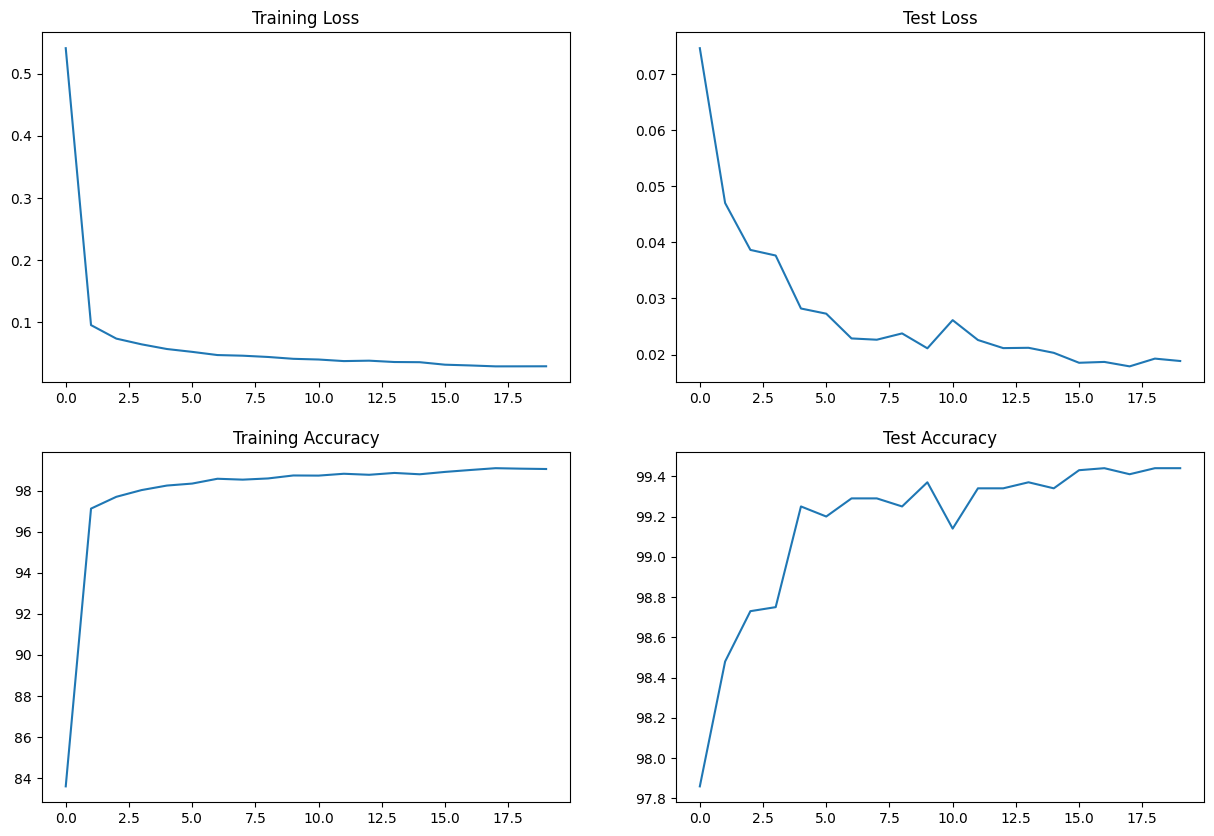

In [7]:
# four plots are generated for train loss,train accuray ,test loss and test accuracy
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")